# Training a Sarcasm Detection Model using Bidirectional LSTMs

In [36]:
#import paskags 
import json
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
#Load data file
with open("data/sarcasm.json") as f:
    datastore = json.load(f)

In [22]:
# Initialize the lists
sentences = []
labels = []

In [23]:
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

### Split the Dataset

In [24]:
training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

In [25]:
#Split label
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

### Data preprocessing

In [27]:
vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


In [28]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [13]:
# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [30]:
# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [31]:
# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

### Build and Compile the Model

In [32]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

In [33]:
#Model LSTM
model_lstm = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size , embedding_dim , input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)) , 
    tf.keras.layers.Dense(dense_dim , activation='relu') ,
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [34]:
# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174129 (680.19 KB)
Trainable params: 174129 (680.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the Model

In [53]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
285/285 [==============================] - 11s 37ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 2/10
285/285 [==============================] - 16s 55ms/step - loss: 0.0033 - accuracy: 0.9987
Epoch 3/10
285/285 [==============================] - 17s 58ms/step - loss: 0.0036 - accuracy: 0.9992
Epoch 4/10
285/285 [==============================] - 18s 62ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 5/10
285/285 [==============================] - 18s 62ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 6/10
285/285 [==============================] - 17s 61ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 7/10
285/285 [==============================] - 18s 63ms/step - loss: 0.0059 - accuracy: 0.9985
Epoch 8/10
285/285 [==============================] - 17s 59ms/step - loss: 0.0051 - accuracy: 0.9981
Epoch 9/10
285/285 [==============================] - 16s 57ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 10/10
285/285 [==============================] - 16s 56ms/step - loss: 0.001

In [66]:
history_lstm.history

{'loss': [0.007096574176102877,
  0.0032637035474181175,
  0.0036189258098602295,
  0.0016762552550062537,
  0.002224593423306942,
  0.006866599433124065,
  0.005925402045249939,
  0.005069039762020111,
  0.001286589540541172,
  0.0013156477361917496],
 'accuracy': [0.9975874423980713,
  0.9986840486526489,
  0.9992323517799377,
  0.9995613694190979,
  0.9993420243263245,
  0.9975874423980713,
  0.9984647631645203,
  0.9981357455253601,
  0.9996710419654846,
  0.9996710419654846]}

KeyError: 'val_accuracy'

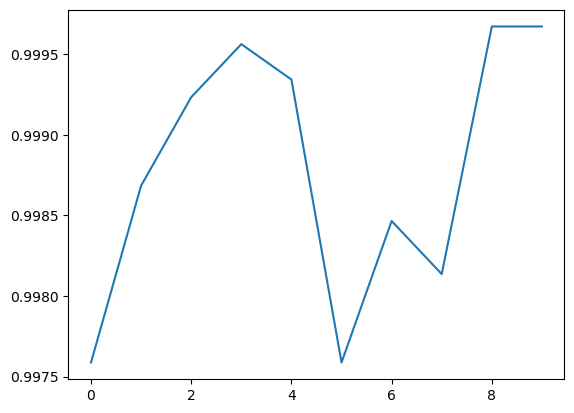

In [59]:
# Plot Utility
def plot_graph(history , string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    
    plt.xlabel('epoch')
    plt.ylabel(string)
    
    plt.legend([string,'val_'+string])
    
    plt.show()
# Plot the accuracy and loss history
plot_graph(history_lstm, 'accuracy')


KeyError: 'val_loss'

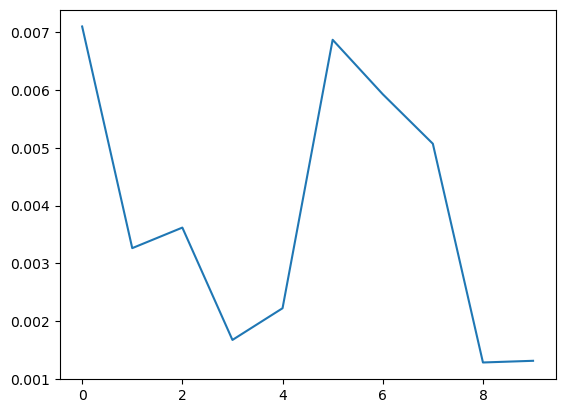

In [60]:
plot_graphs(history_lstm, 'loss')